In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [261]:
df=pd.read_csv('Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [262]:
df.head(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [263]:
df.tail(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [264]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [265]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [266]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [268]:
df=pd.DataFrame(data=df)
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [269]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

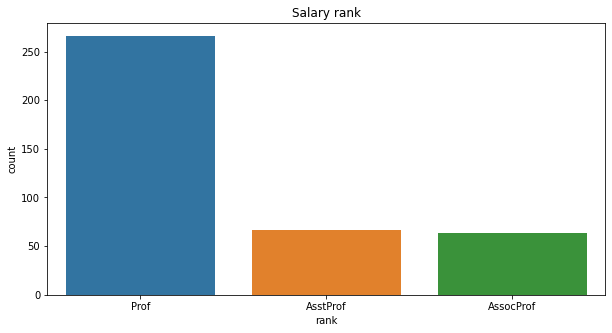

In [270]:
plt.figure(figsize=[10,5])
plt.title('Salary rank')
sns.countplot(df['rank'],data=df)
df['rank'].value_counts()

92000     5
72500     4
74000     4
101000    3
105000    3
         ..
107986    1
166024    1
102580    1
82099     1
121200    1
Name: salary, Length: 371, dtype: int64

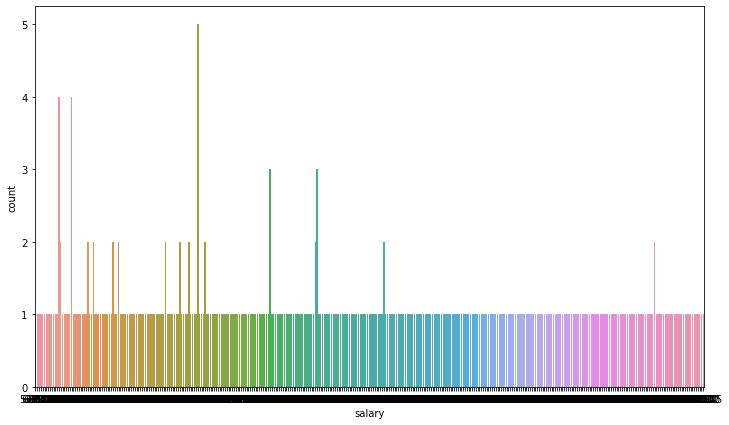

In [271]:
plt.figure(figsize=[12,7])
sns.countplot(df['salary'],data=df)
df['salary'].value_counts()

4     19
28    16
8     14
20    13
19    13
13    12
17    12
12    12
38    11
23    11
21    11
39    10
10    10
11    10
31    10
30     9
22     9
15     9
14     9
9      9
25     9
33     8
35     8
37     8
29     8
27     8
18     8
16     8
3      8
40     7
26     6
24     6
32     6
7      6
6      6
5      6
45     6
2      5
43     5
36     5
49     4
46     4
1      4
42     4
41     4
34     3
56     2
44     1
47     1
48     1
51     1
52     1
54     1
Name: yrs.since.phd, dtype: int64

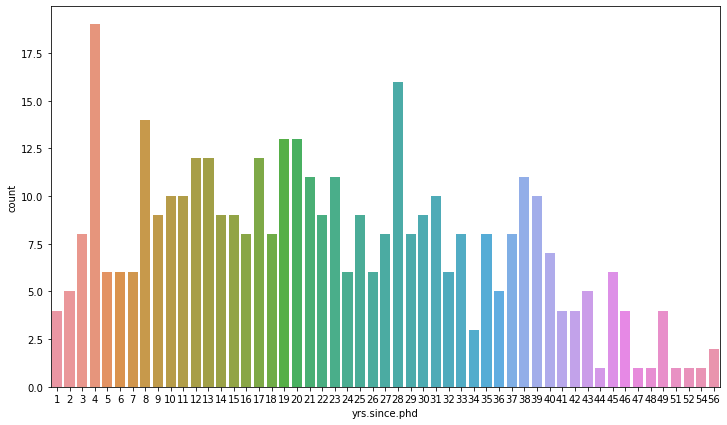

In [272]:
plt.figure(figsize=[12,7])
sns.countplot(df['yrs.since.phd'],data=df)
df['yrs.since.phd'].value_counts()

3     22
19    19
7     18
8     18
23    16
18    15
2     15
9     15
11    14
4     13
1     13
0     11
27    11
6     11
10    11
20    10
31    10
30     9
15     9
28     9
16     8
14     8
22     8
38     8
5      8
25     8
26     7
17     6
36     6
21     6
40     5
35     5
12     5
39     4
45     4
33     4
43     4
37     4
49     3
44     3
24     2
34     2
41     1
32     1
13     1
46     1
48     1
29     1
51     1
53     1
57     1
60     1
Name: yrs.service, dtype: int64

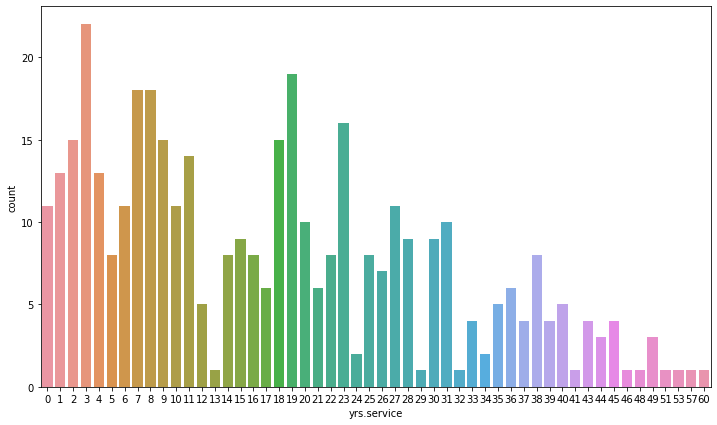

In [273]:
plt.figure(figsize=[12,7])
sns.countplot(df['yrs.service'],data=df)
df['yrs.service'].value_counts()

Male      358
Female     39
Name: sex, dtype: int64

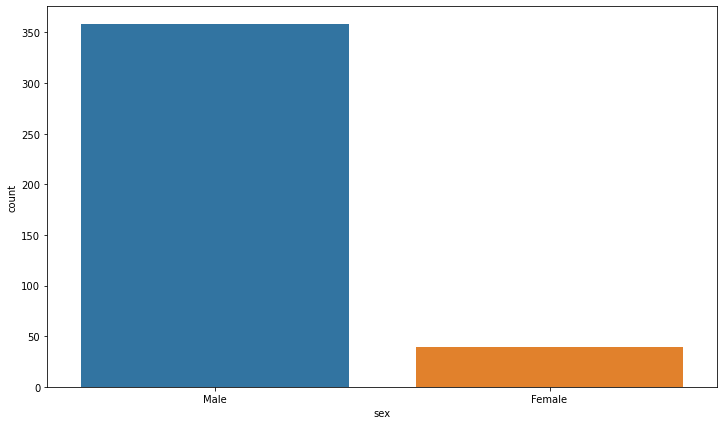

In [274]:
plt.figure(figsize=[12,7])
sns.countplot(df['sex'],data=df)
df['sex'].value_counts()

B    216
A    181
Name: discipline, dtype: int64

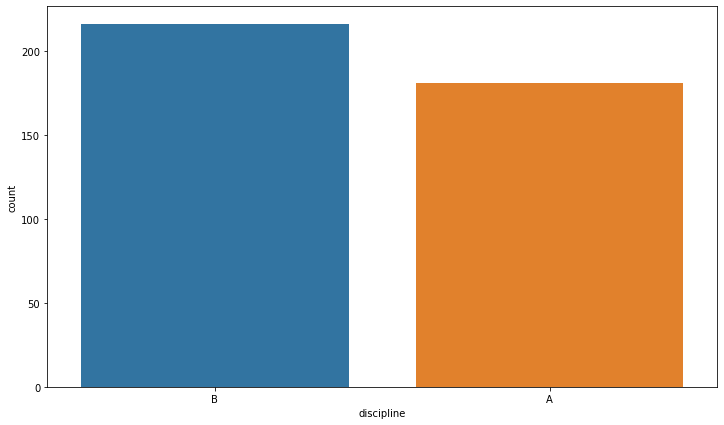

In [275]:
plt.figure(figsize=[12,7])
sns.countplot(df['discipline'],data=df)
df['discipline'].value_counts()

<AxesSubplot:xlabel='salary'>

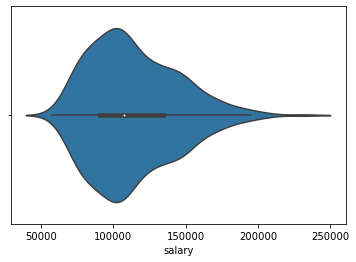

In [276]:
sns.violinplot(x='salary',data=df)

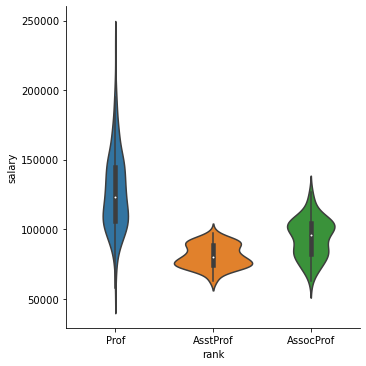

In [277]:
sns.catplot(x='rank',y='salary',data=df,kind='violin')
plt.show()

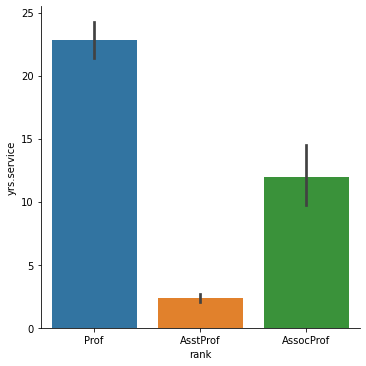

In [278]:
sns.catplot(x='rank',y='yrs.service',data=df,kind='bar')
plt.show()

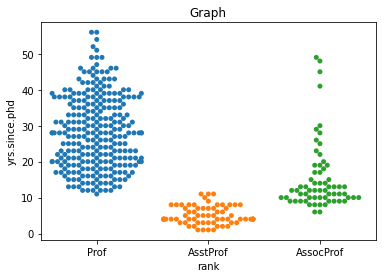

In [279]:
sns.swarmplot(x='rank',y='yrs.since.phd',data=df)
plt.title('Graph')
plt.show()

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

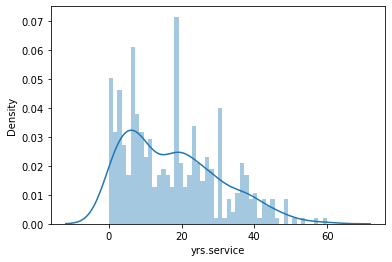

In [280]:
sns.distplot(df['yrs.service'],bins=50)

<AxesSubplot:xlabel='yrs.service'>

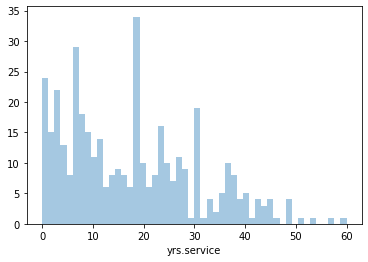

In [281]:
sns.distplot(df['yrs.service'],bins=50,kde=False)

<AxesSubplot:xlabel='rank', ylabel='salary'>

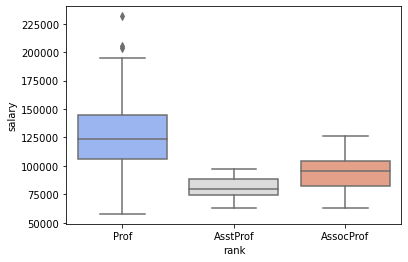

In [282]:
sns.boxplot(x='rank',y='salary',data=df,palette='coolwarm')

In [283]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [284]:
lencode=LabelEncoder()
df['discipline']=lencode.fit_transform(df['discipline'])
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,1,19,18,Male,139750
1,Prof,1,20,16,Male,173200
2,AsstProf,1,4,3,Male,79750
3,Prof,1,45,39,Male,115000
4,Prof,1,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,0,33,30,Male,103106
393,Prof,0,31,19,Male,150564
394,Prof,0,42,25,Male,101738
395,Prof,0,25,15,Male,95329


In [285]:
lencode=LabelEncoder()
df['sex']=lencode.fit_transform(df['sex'])
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,1,19,18,1,139750
1,Prof,1,20,16,1,173200
2,AsstProf,1,4,3,1,79750
3,Prof,1,45,39,1,115000
4,Prof,1,40,41,1,141500
...,...,...,...,...,...,...
392,Prof,0,33,30,1,103106
393,Prof,0,31,19,1,150564
394,Prof,0,42,25,1,101738
395,Prof,0,25,15,1,95329


In [286]:
lencode=LabelEncoder()
df['rank']=lencode.fit_transform(df['rank'])
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [287]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [288]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

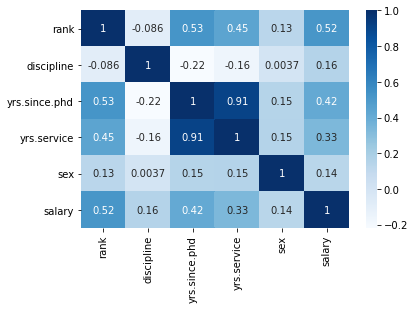

In [289]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

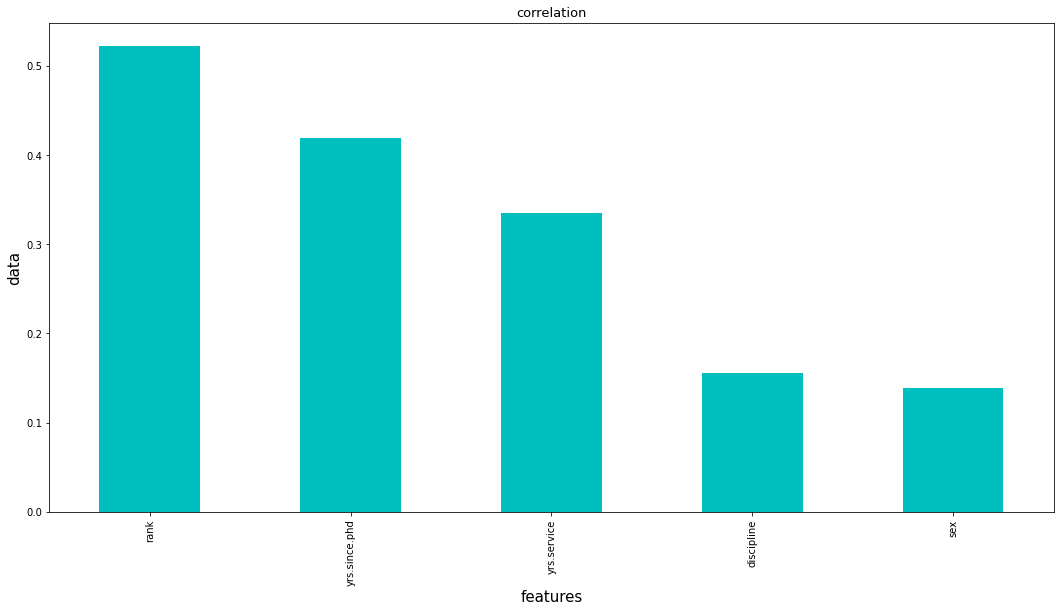

In [290]:
plt.figure(figsize=(18,9))
df.corr()['salary'].sort_values(ascending=False).drop(['salary']).plot(kind='bar',color='c')
plt.xlabel('features',fontsize=15)
plt.ylabel('data',fontsize=15)
plt.title('correlation',fontsize=13)
plt.show()

rank                AxesSubplot(0.125,0.536818;0.110714x0.343182)
discipline       AxesSubplot(0.257857,0.536818;0.110714x0.343182)
yrs.since.phd    AxesSubplot(0.390714,0.536818;0.110714x0.343182)
yrs.service      AxesSubplot(0.523571,0.536818;0.110714x0.343182)
sex              AxesSubplot(0.656429,0.536818;0.110714x0.343182)
salary           AxesSubplot(0.789286,0.536818;0.110714x0.343182)
dtype: object

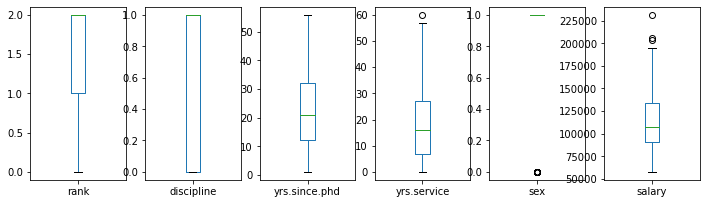

In [291]:
df.plot(kind='box',layout=(2,6),subplots=True,figsize=(12,7))

In [292]:
df.shape

(397, 6)

In [293]:
x=df.iloc[:,0:-1]
x.head(10)

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2,1,19,18,1
1,2,1,20,16,1
2,1,1,4,3,1
3,2,1,45,39,1
4,2,1,40,41,1
5,0,1,6,6,1
6,2,1,30,23,1
7,2,1,45,45,1
8,2,1,21,20,1
9,2,1,18,18,0


In [294]:
y=df.iloc[:,-1]
y.head(10)

0    139750
1    173200
2     79750
3    115000
4    141500
5     97000
6    175000
7    147765
8    119250
9    129000
Name: salary, dtype: int64

In [295]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [296]:
x_train.shape

(265, 5)

In [297]:
y_train.shape

(265,)

In [298]:
x_test.shape

(132, 5)

In [299]:
lm=LinearRegression()

In [300]:
lm.fit(x_train,y_train)

LinearRegression()

In [301]:
pred=lm.predict(x_test)
print('predicted result price:',pred)
print('actual price',y_test)

predicted result price: [103444.52685913 114514.2664229   78864.75702171  85904.05346593
 137180.52012986 104213.3736425  137981.89881075  96832.74105031
  83674.09932933 115738.38278049 120579.94873603 123025.16477302
 134507.74548997 130499.33971527 119427.48975206  84793.87053459
 146267.3489574   81146.88373446 131597.82397323  98600.69813574
 124557.77713146 117001.75851253 139030.32089199 126469.33874368
  77608.4170162  106146.97259956  98662.45898583  99381.99399002
 122666.60659544 109477.52139356 119469.7658047  123705.13215316
 142279.0260093  129738.12668758 133849.97133586 133602.9279355
 127280.61394808 126798.22582073 123920.08580396 134804.85106705
 115090.19690031 119674.53315242  92626.91190401 108038.45138517
 137438.0580829  130108.69178812 127908.40875206 145876.70103025
 145896.78385686 129018.59168339 111183.7176289   85513.40553878
 124362.30827811 100091.94072029 133048.59265498  80436.9370042
 120322.410783   108367.33846222 124968.5078852   83354.80052621
 12

In [302]:
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean absolute error:',np.sqrt(mean_squared_error(y_test,pred)))

Mean absolute error: 18899.39641591268
Mean squared error: 612016775.8602993
Root Mean absolute error: 24738.97281336271


In [311]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.23777745135260442
